<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/ML_L9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

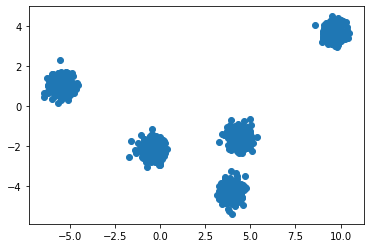

In [42]:
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=.35, random_state=123)

X_train, X_new = train_test_split(X, test_size=0.01)

plt.scatter(X_train[:, 0], X_train[:,1])
plt.show()

In [43]:
clusters = 4
kmeans = KMeans(n_clusters=clusters)

y_pred = kmeans.fit_predict(X_train)

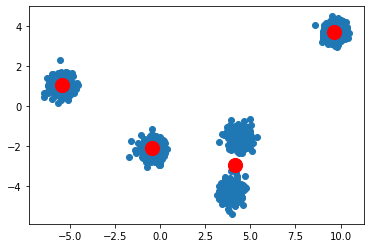

In [44]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red')
plt.show()

In [45]:
y_pred[:20]

array([0, 3, 0, 0, 1, 0, 0, 3, 0, 1, 0, 3, 1, 2, 0, 0, 1, 0, 2, 0],
      dtype=int32)

In [46]:
kmeans.inertia_

997.0765455725796

In [47]:
kmeans.cluster_centers_

array([[ 4.16113625, -2.937989  ],
       [-5.46500974,  1.04928041],
       [ 9.64625311,  3.69467621],
       [-0.43707655, -2.13146686]])

In [48]:
kmeans.predict(X_new)

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 2], dtype=int32)

In [49]:
kmeans.transform(X_new)

array([[ 1.81943606, 10.69763266, 10.32634419,  4.74807735],
       [10.93166771,  0.60296171, 15.94402506,  6.40713997],
       [ 1.7872862 , 10.22262509,  7.08446058,  5.03718816],
       [11.42812071,  1.00938512, 16.18429511,  6.95078851],
       [ 1.20798675, 11.10312124,  9.44533672,  5.19312956],
       [ 1.53966887, 10.34507271,  7.22872555,  5.05518546],
       [10.52814577,  0.11304371, 15.44934698,  6.0517942 ],
       [ 1.37896962,  9.9735865 ,  9.98060362,  4.03779744],
       [11.04884108,  0.97764914, 16.26587004,  6.46978913],
       [ 9.13736716, 15.54783875,  0.6114823 , 12.03794464]])

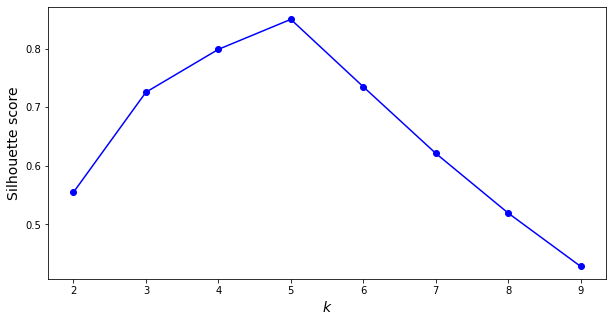

In [50]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=123).fit(X) for k in range(1,10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:]]

plt.figure(figsize=(10,5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()

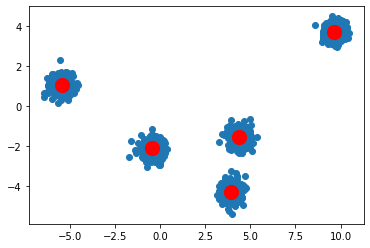

In [51]:
kmeans = KMeans(n_clusters=5)

y_pred = kmeans.fit_predict(X_train)

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.show()

In [52]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

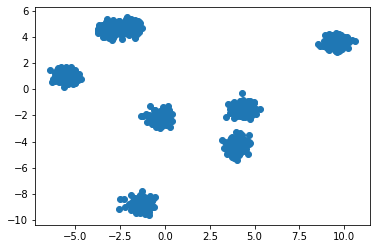

In [54]:
X, y = make_blobs(n_samples=1000, centers=8, cluster_std=.35, random_state=123)

# plotting dataset
plt.scatter(X[:,0], X[:,1])
plt.show()

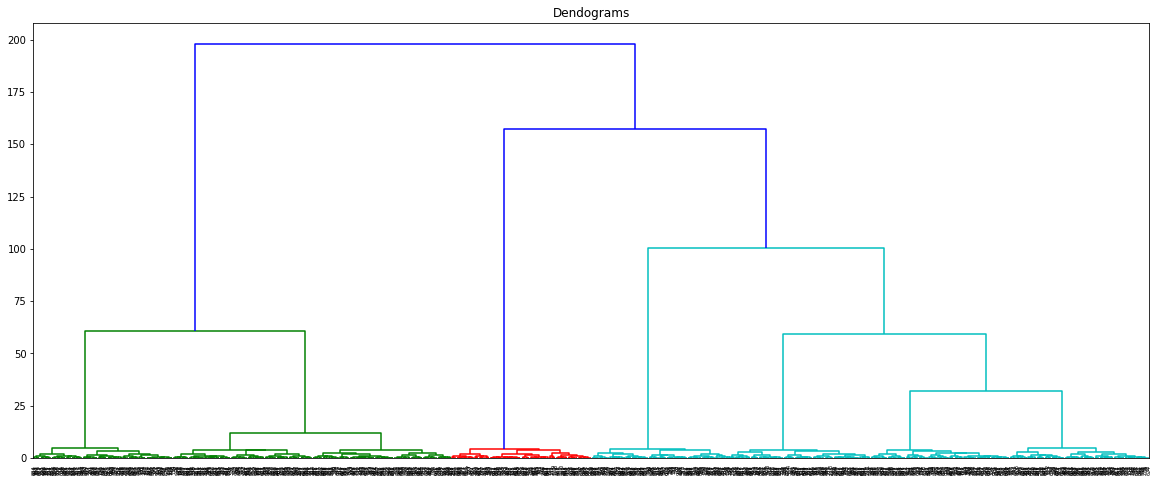

In [56]:
plt.figure(figsize=(20,8))
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendograms')
# plt.axhline(linestyle='--', y=15)
plt.show()

In [57]:
agglo_clus = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')


In [58]:
agglo_clus.fit(X)

labels = agglo_clus.labels_

labels[:10]

array([2, 5, 4, 5, 5, 4, 2, 2, 5, 2])

In [59]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0,1,7))
colors

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.70588235e-01, 4.94655843e-01, 9.66718404e-01, 1.00000000e+00],
       [1.66666667e-01, 8.66025404e-01, 8.66025404e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [8.33333333e-01, 8.66025404e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 4.94655843e-01, 2.55842778e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

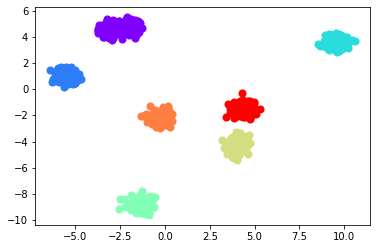

In [63]:
for i in range(7):
  plt.scatter(X[labels==i,0], X[labels==i,1], s=50, color=colors[i], marker='o')